In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh1/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh1"])
df1 = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh2/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh2"])
df2 = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh3/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh3"])


In [21]:
params = pd.concat([df, df1, df2])

In [22]:
params = params.fillna(0)

In [23]:
params.sample(5)

,a1,a2,a3,a4,a5,a6,a7,n1,n2,t_half,v_max,mmh1,mmh2,mmh3
23,0.381216,0.426411,1.061173,3.842241e-01,3.659696e-01,0.013846,0.013498,1.168055,1.151915,15.791875,1.108712,0.0,0.0,1.0
69,0.723619,0.492841,0.771256,3.208795e+09,3.101629e+03,0.058193,0.066756,1.030120,1.070763,16.903589,1.310881,0.0,1.0,0.0
41,0.657898,0.656100,1.115177,2.458458e+00,3.486155e+08,0.004749,0.003675,1.050822,1.104520,12.575456,1.244836,0.0,1.0,0.0
22,0.650029,0.560179,1.306362,8.556016e+00,6.607778e-01,0.002949,0.000806,1.060960,1.178258,13.486092,1.222190,1.0,0.0,0.0
12,0.582263,0.484049,0.621306,9.918723e-01,6.162572e-01,0.031155,0.033396,1.083724,0.954545,13.919867,1.086420,0.0,0.0,1.0


In [24]:
params["mmh1"] = params["mmh1"]+2*params["mmh2"]+3*params["mmh3"]
params = params[params.columns[0:12]]
params["mmh1"] = params["mmh1"].astype(int)

In [25]:
params.sample(5)

,a1,a2,a3,a4,a5,a6,a7,n1,n2,t_half,v_max,mmh1
22,0.752292,0.674371,0.832843,7.290578e+10,1.152273e+11,0.012554,0.011931,1.014812,0.991748,10.874709,1.134534,2
50,0.660336,0.459222,0.669993,2.357010e+00,1.642173e+05,0.004086,0.001895,1.049386,1.043501,16.864984,1.253664,2
111,0.698696,0.556068,0.730486,1.341012e+02,3.831397e+10,0.007808,0.006571,1.039992,1.009464,13.059971,1.169366,1
62,0.455394,0.677819,2.699497,5.410633e-01,3.345225e-01,0.011018,0.011371,1.138703,1.327140,10.708619,1.172225,3
45,0.538839,0.529174,1.266085,4.937656e-01,5.370649e-01,0.005405,0.002497,1.078082,1.184388,14.354191,1.203779,3


In [26]:
params['n1-n2'] = params ['n1'] - params['n2']

In [27]:
params.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 63
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      290 non-null    float64
 1   a2      290 non-null    float64
 2   a3      290 non-null    float64
 3   a4      290 non-null    float64
 4   a5      290 non-null    float64
 5   a6      290 non-null    float64
 6   a7      290 non-null    float64
 7   n1      290 non-null    float64
 8   n2      290 non-null    float64
 9   t_half  290 non-null    float64
 10  v_max   290 non-null    float64
 11  mmh1    290 non-null    int32  
 12  n1-n2   290 non-null    float64
dtypes: float64(12), int32(1)
memory usage: 30.6 KB


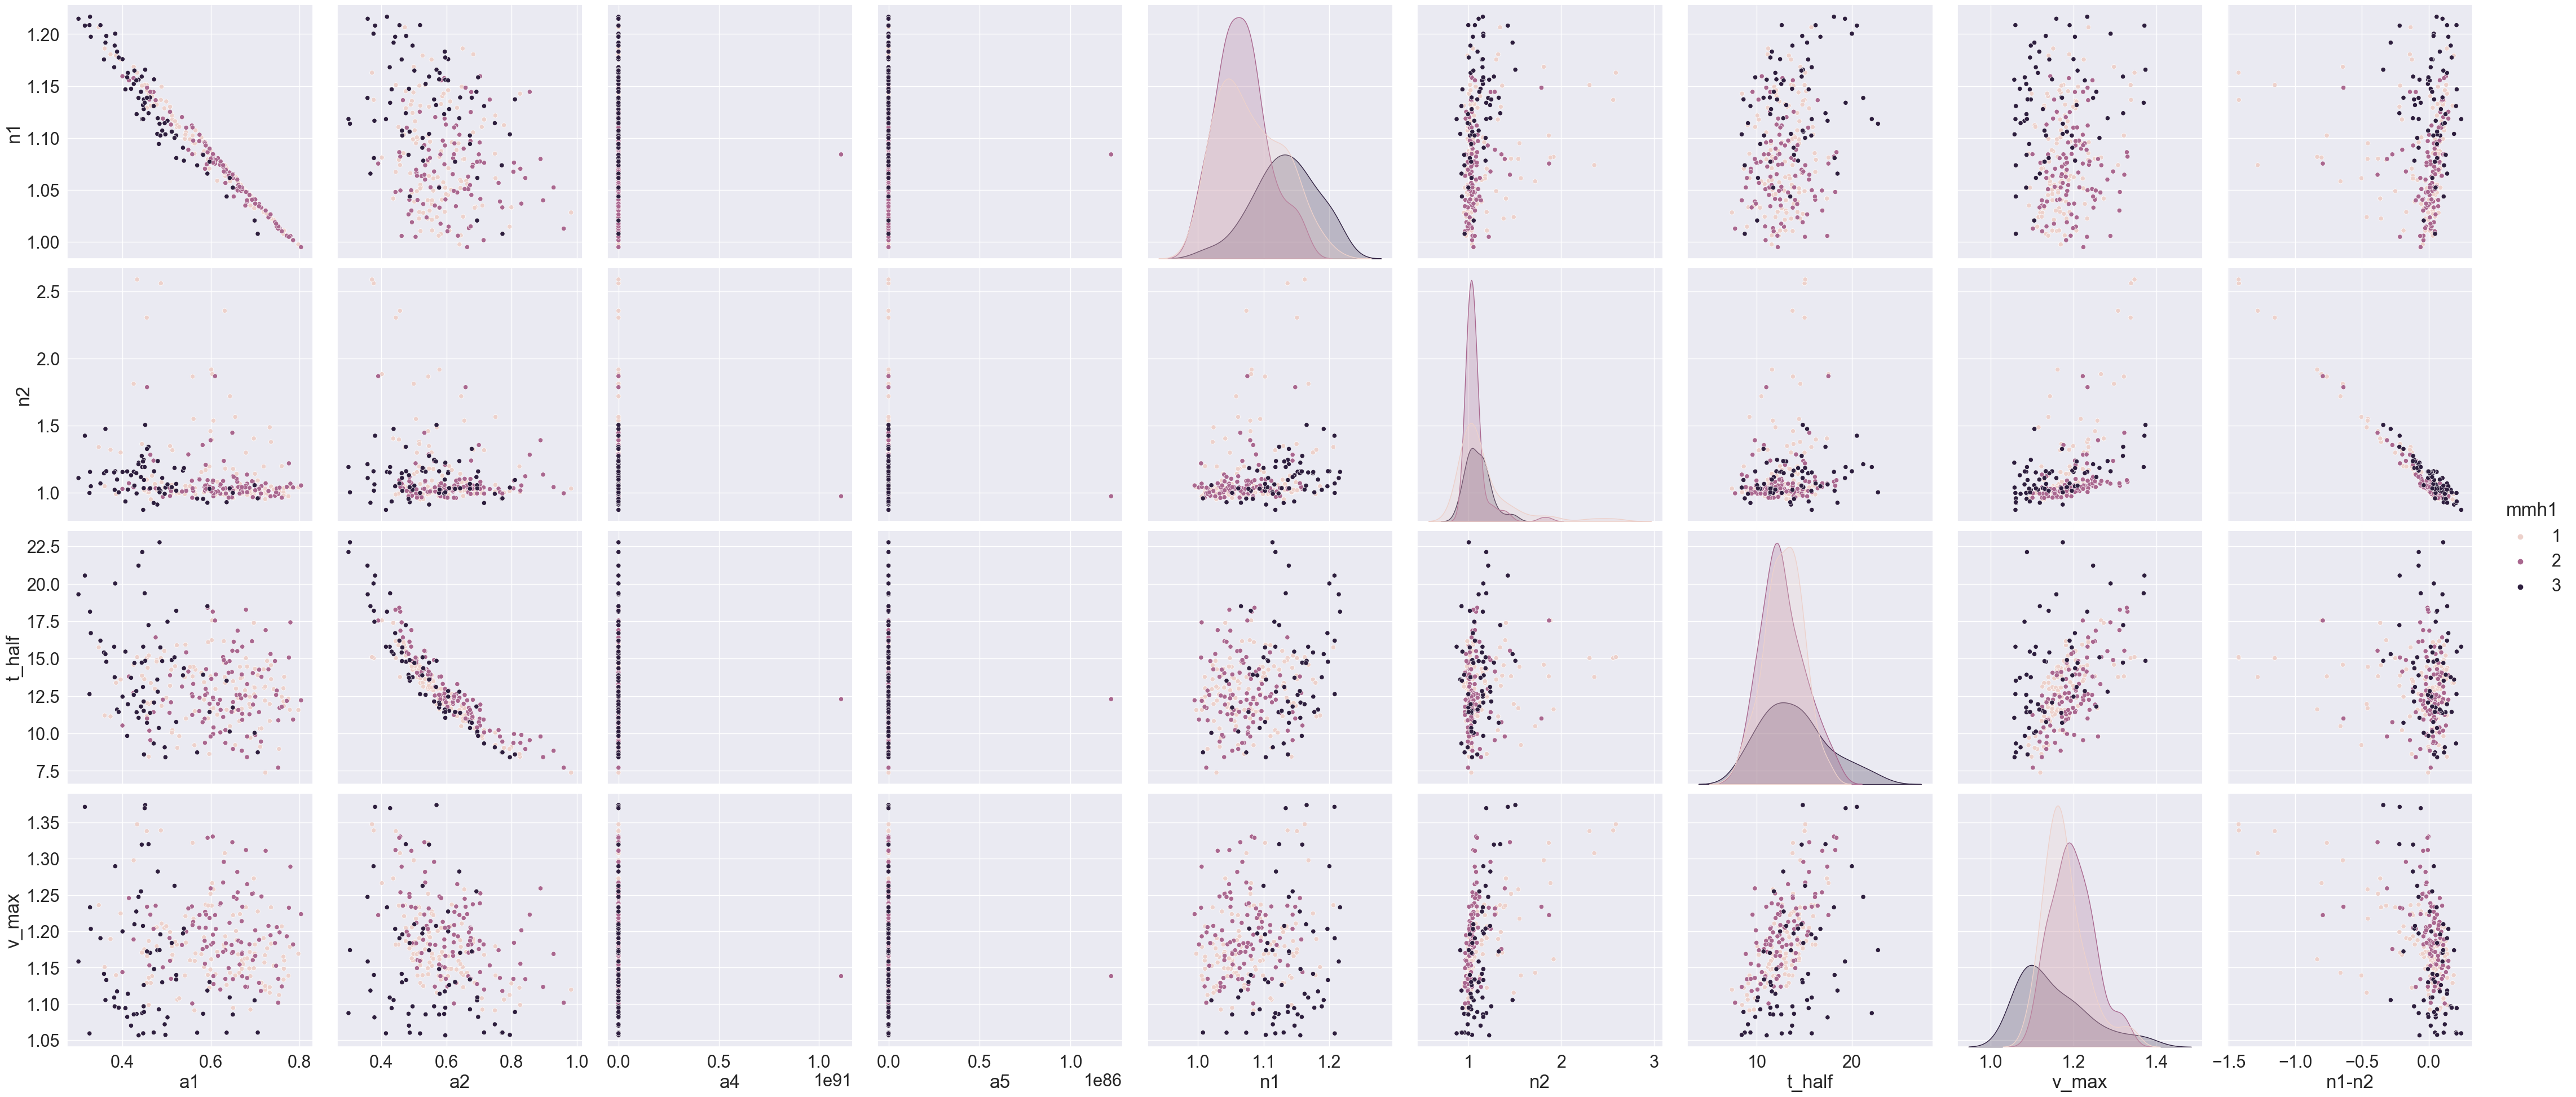

In [28]:
sns.pairplot(params, ## put the data frame here
                y_vars = ["n1","n2","t_half","v_max"], ## put a list of the desired vertical variables here
                x_vars = ["a1","a2","a4","a5","n1","n2","t_half","v_max","n1-n2"], ## put a list of the desired horizontal variables here
                height = 5,
                hue="mmh1")

plt.show()

In [29]:
##count the number of each mmh1 type
params['mmh1'].value_counts()

2    114
1    112
3     64
Name: mmh1, dtype: int64

In [30]:
params['a4_log'] = params['a4'].apply(np.log10)
params['a5_log'] = params['a5'].apply(np.log10)

In [31]:
params_trimmed = params[params['a4'] <100]
params_trimmed = params_trimmed[params_trimmed['a5'] <100]

In [32]:
params_trimmed.sample(5)

,a1,a2,a3,a4,a5,a6,a7,n1,n2,t_half,v_max,mmh1,n1-n2,a4_log,a5_log
86,0.414495,0.584095,0.912972,0.458207,17.963103,0.032356,3.611801e-02,1.155464,1.071134,13.801847,1.245758,2,0.084330,-0.338938,1.254381
4,0.425058,0.593663,0.859553,0.568667,13.839569,0.010042,9.833296e-03,1.157564,1.041803,12.706356,1.188727,2,0.115761,-0.245142,1.141123
24,0.425301,0.500028,10.637149,0.713667,0.168304,0.018129,1.915961e-02,1.168470,1.812110,14.590630,1.297706,1,-0.643640,-0.146505,-0.773906
49,0.488301,0.647128,1.019626,7.035940,11.408055,0.001633,8.702085e-14,1.149321,1.078654,11.840078,1.210747,1,0.070667,0.847322,1.057212
50,0.458835,0.475762,1.950266,0.450526,0.361896,0.013619,1.292902e-02,1.123804,1.342899,17.237903,1.319947,3,-0.219096,-0.346281,-0.441416


In [33]:
params_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 63
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      143 non-null    float64
 1   a2      143 non-null    float64
 2   a3      143 non-null    float64
 3   a4      143 non-null    float64
 4   a5      143 non-null    float64
 5   a6      143 non-null    float64
 6   a7      143 non-null    float64
 7   n1      143 non-null    float64
 8   n2      143 non-null    float64
 9   t_half  143 non-null    float64
 10  v_max   143 non-null    float64
 11  mmh1    143 non-null    int32  
 12  n1-n2   143 non-null    float64
 13  a4_log  143 non-null    float64
 14  a5_log  143 non-null    float64
dtypes: float64(14), int32(1)
memory usage: 17.3 KB


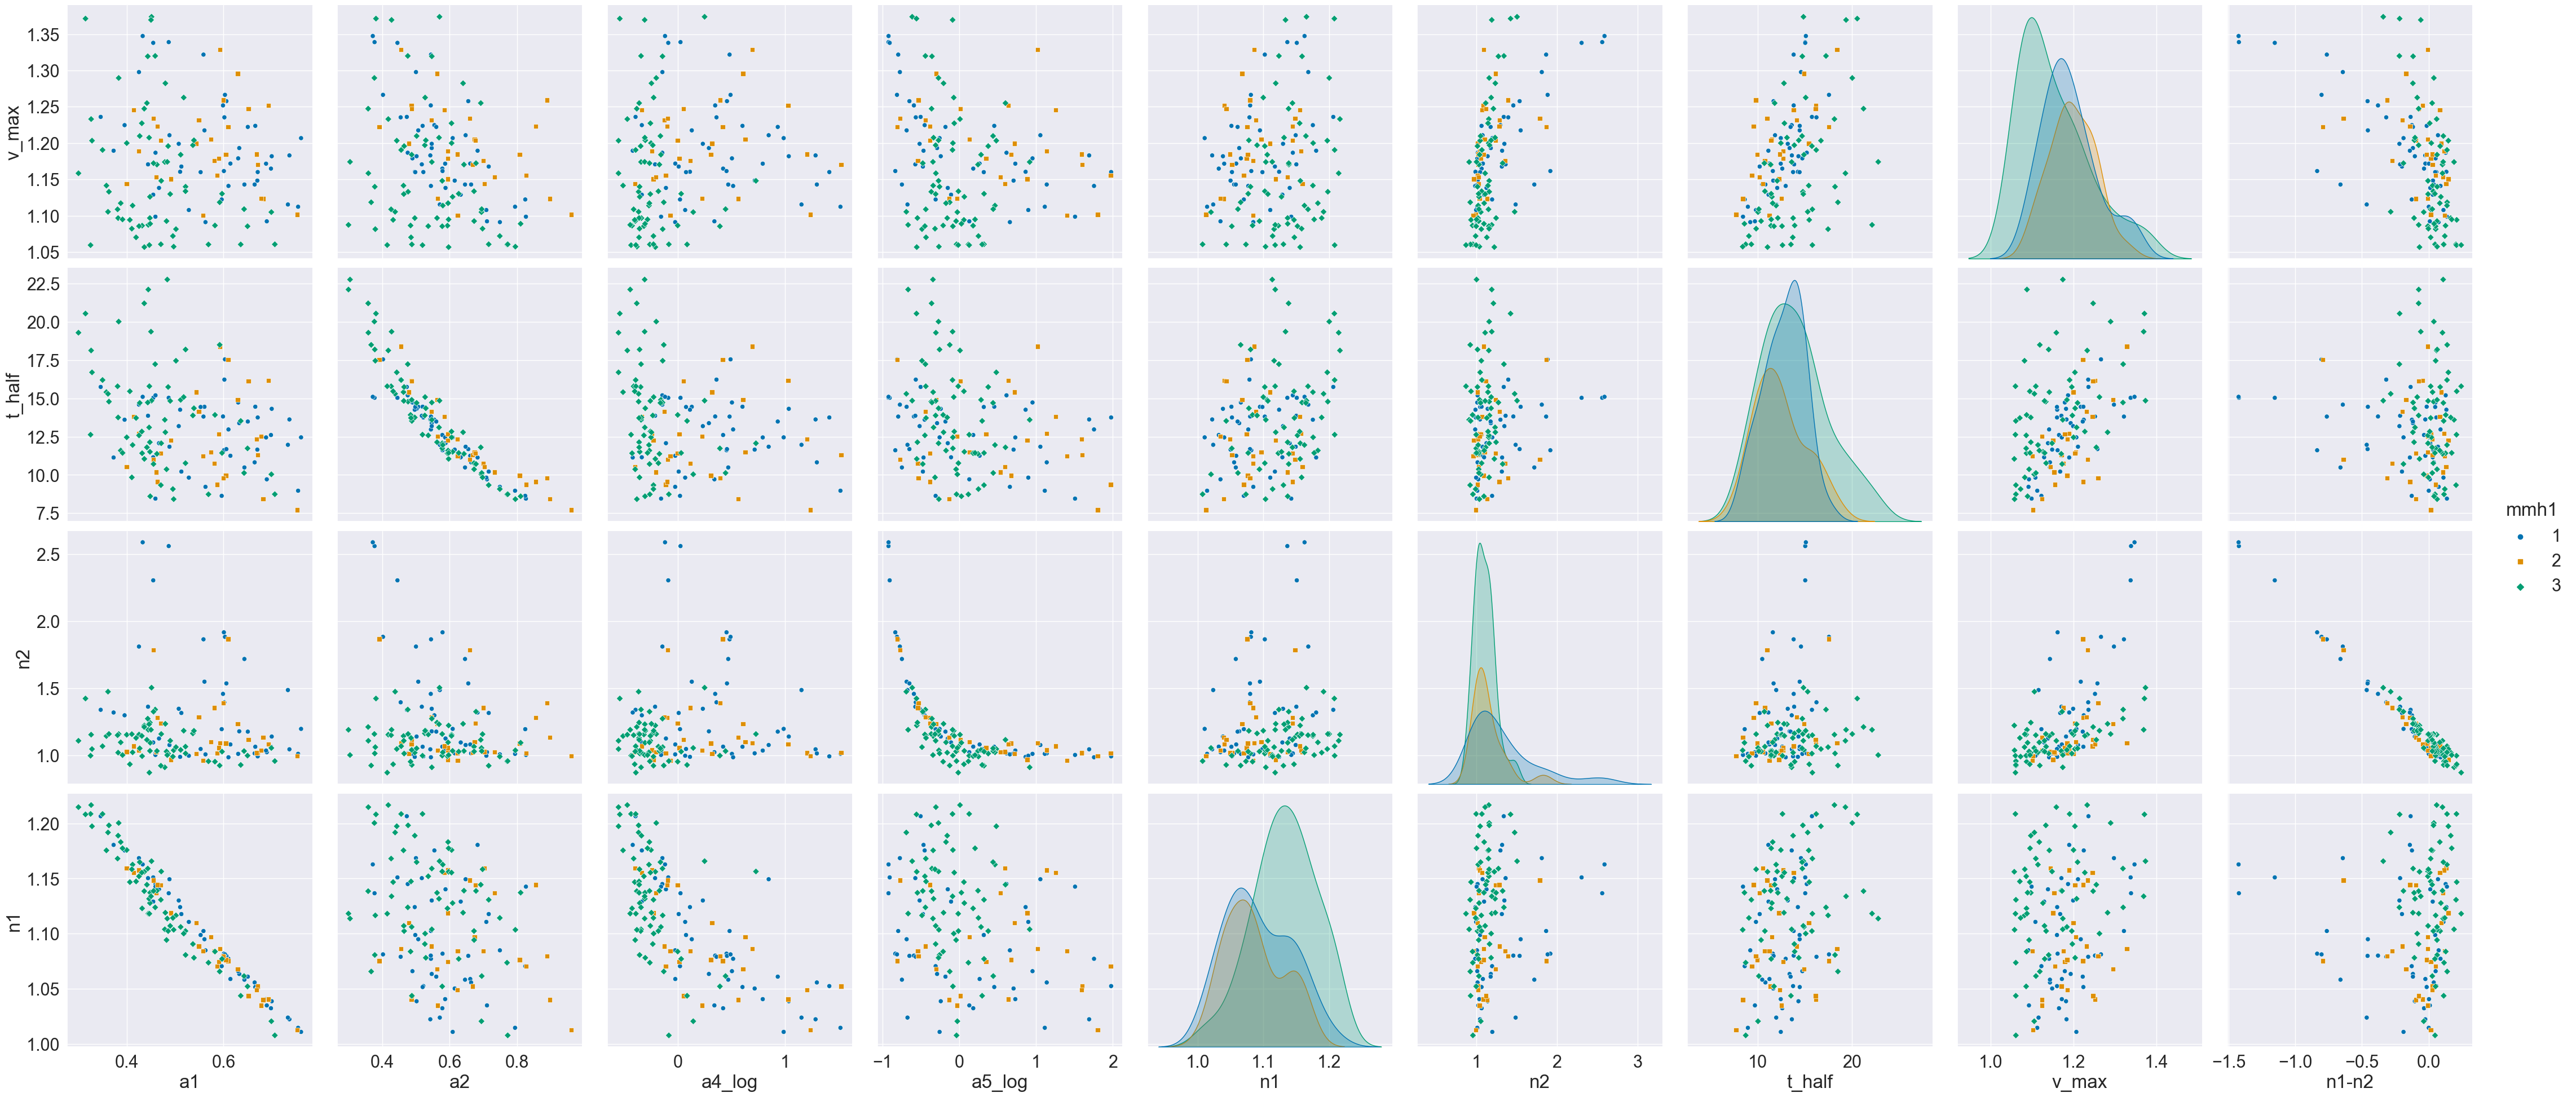

In [35]:
sns.pairplot(params_trimmed, ## put the data frame here
                y_vars = ["v_max","t_half","n2","n1"], ## put a list of the desired vertical variables here
                x_vars = ["a1","a2","a4_log","a5_log","n1","n2","t_half","v_max","n1-n2"], ## put a list of the desired horizontal variables here
                height = 5,
                hue="mmh1", palette="colorblind",
                markers=["o", "s", "D"])
sns.set(font_scale=2)
plt.show()